In [ ]:
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [ ]:
df = pd.read_csv('/content/telecom_churn.csv')

In [ ]:
df.head()

State  Account length  ...  Customer service calls  Churn
0    KS             128  ...                       1  False
1    OH             107  ...                       1  False
2    NJ             137  ...                       0  False
3    OH              84  ...                       2  False
4    OK              75  ...                       3  False

[5 rows x 20 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3973c6a490>,
      dtype=object)

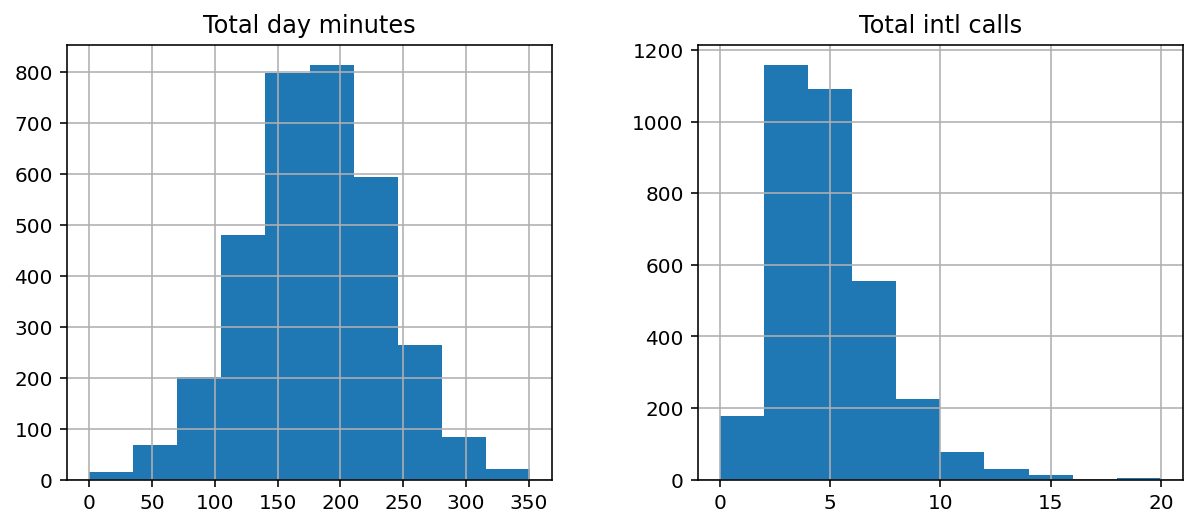

In [ ]:
features = ['Total day minutes','Total intl calls']
df[features].hist(figsize=(10,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3973717b10>,
      dtype=object)

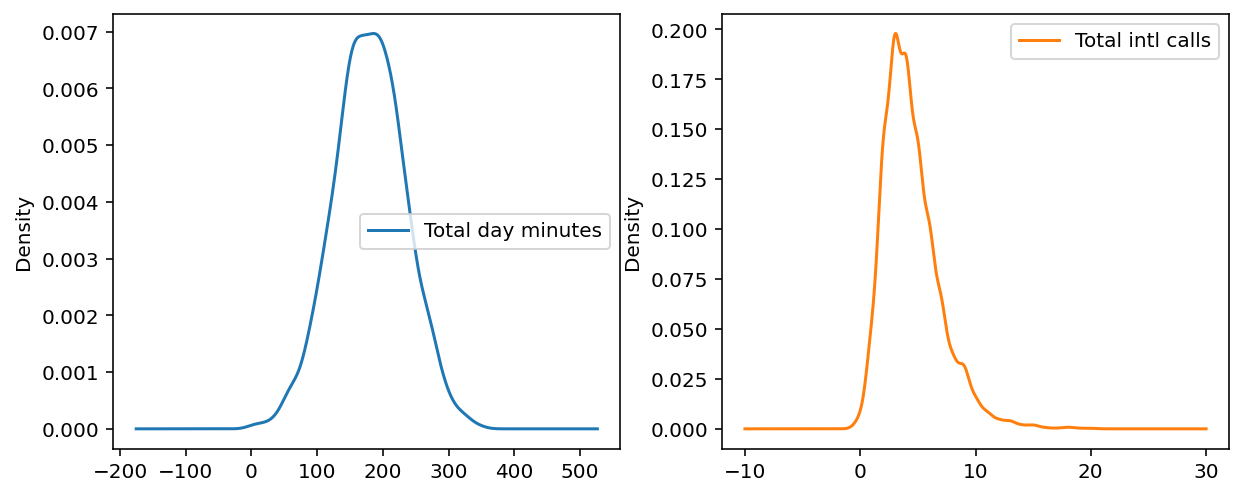

In [ ]:
df[features].plot(kind='density',subplots=True,layout=(1,2),sharex=False,figsize=(10,4))

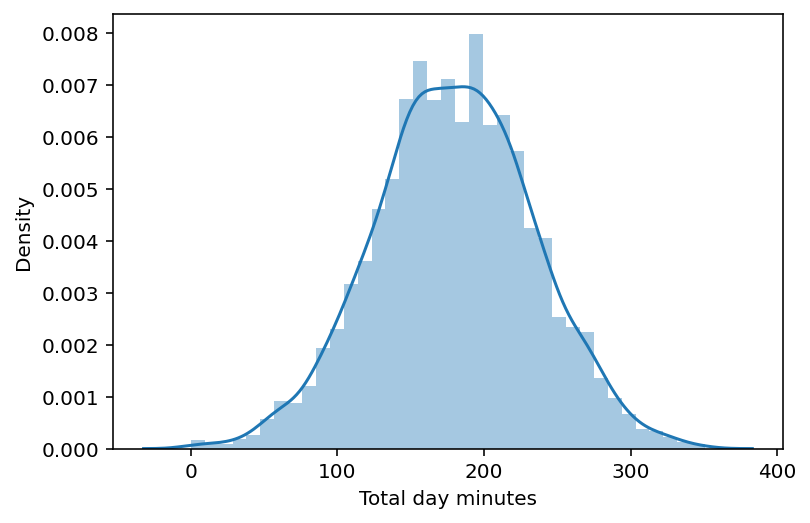

In [ ]:
sns.distplot(df['Total day minutes'])

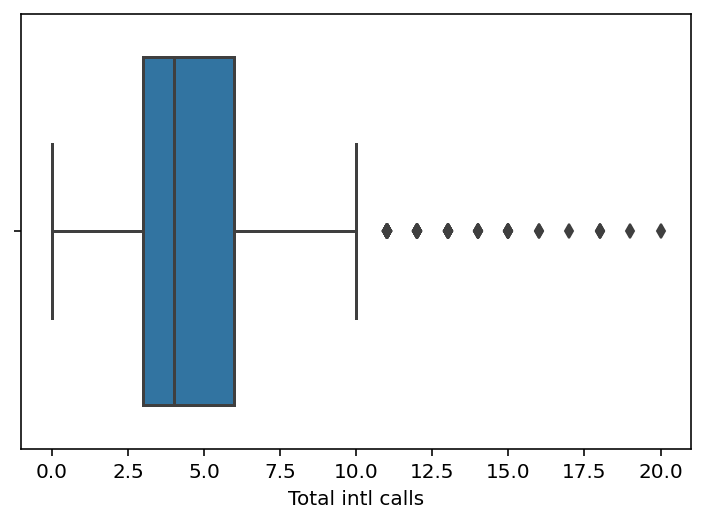

In [ ]:
sns.boxplot(x='Total intl calls',data=df)

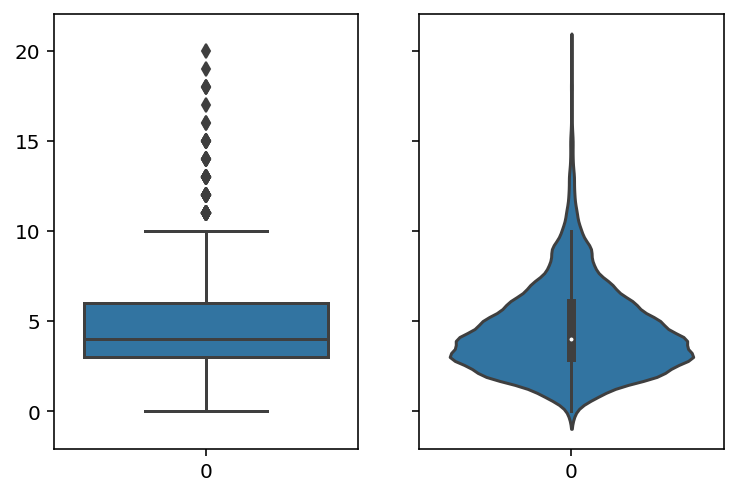

In [ ]:
_, axes = plt.subplots(1,2,sharey=True, figsize =(6,4))
sns.boxplot(data=df['Total intl calls'],ax=axes[0])
sns.violinplot(data=df['Total intl calls'],ax=axes[1])

In [ ]:
df[features].describe()

Total day minutes  Total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

In [ ]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

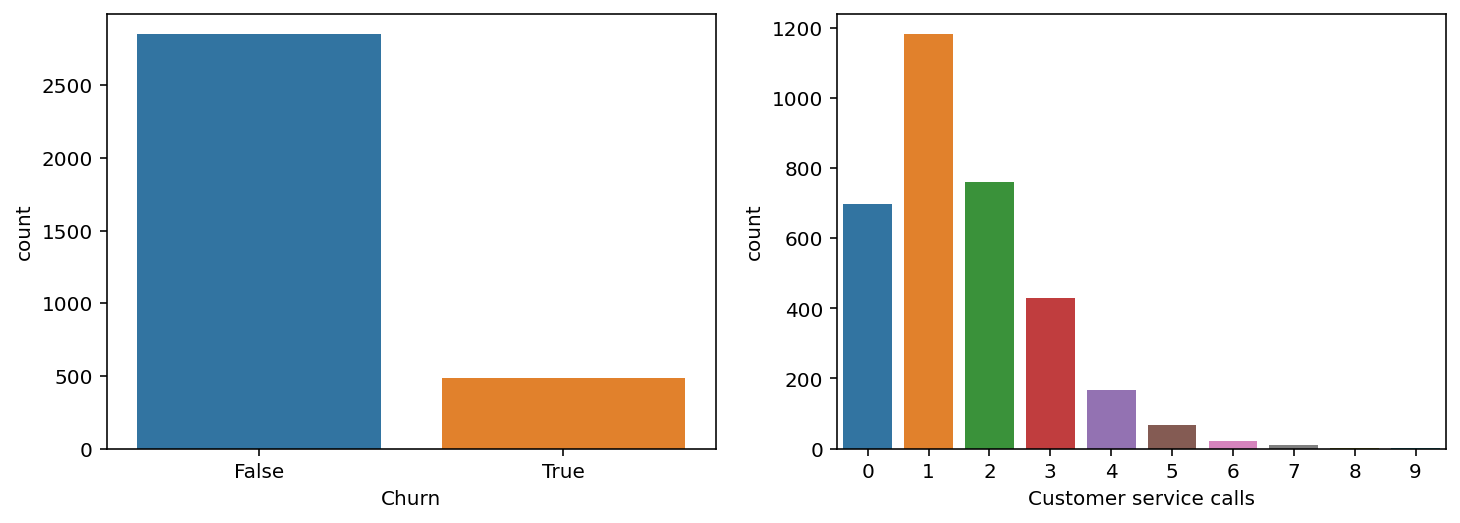

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,4))
sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x='Customer service calls', data=df, ax=axes[1])

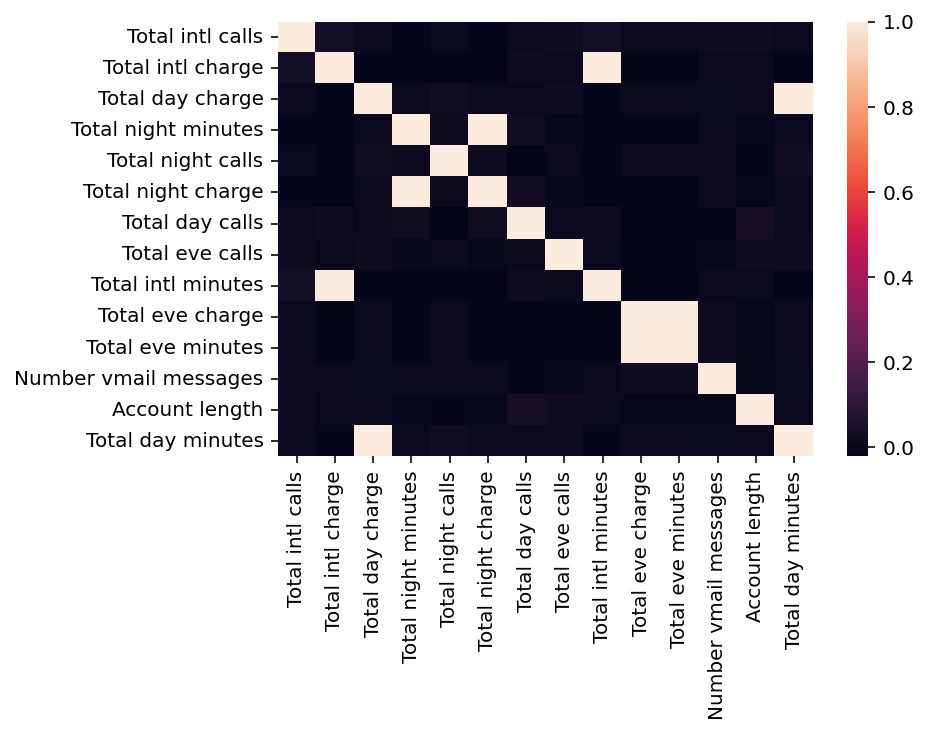

In [ ]:
numerical = list(set(df.columns)-{'State','International plan','Voice mail plan','Area code','Churn','Customer service calls'})
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

In [ ]:
numerical = list(set(numerical)-{'Total day charge','Total night charge','Total eve charge','Toatl intl charge'})


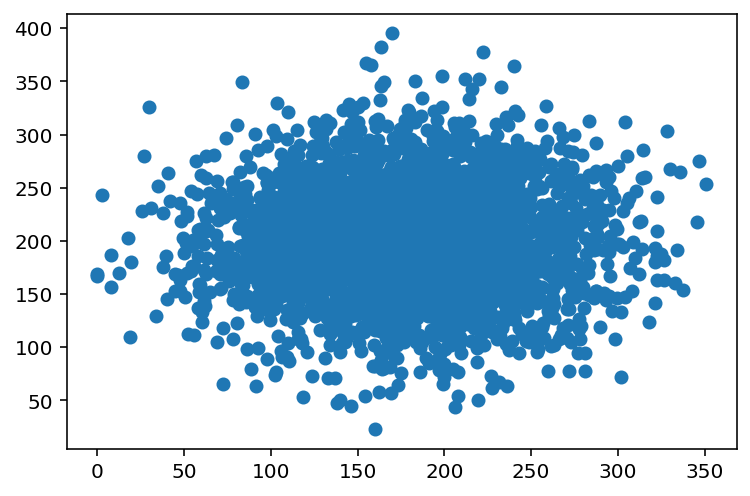

In [ ]:
plt.scatter(df['Total day minutes'],df['Total night minutes'])

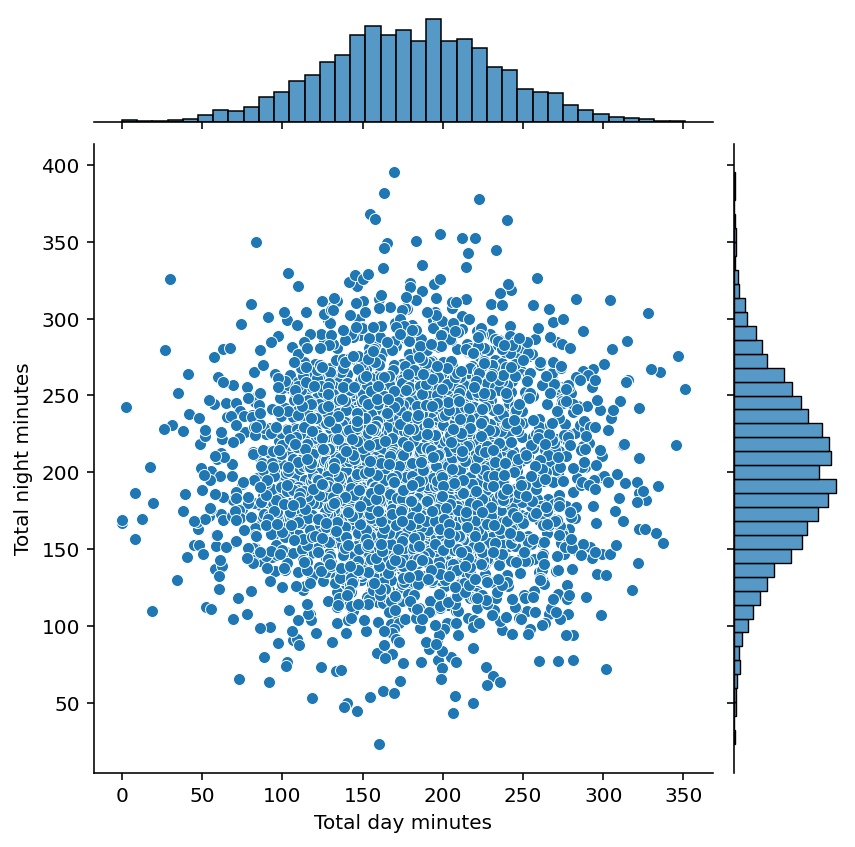

In [ ]:
sns.jointplot(x='Total day minutes', y='Total night minutes', data=df, kind="scatter")

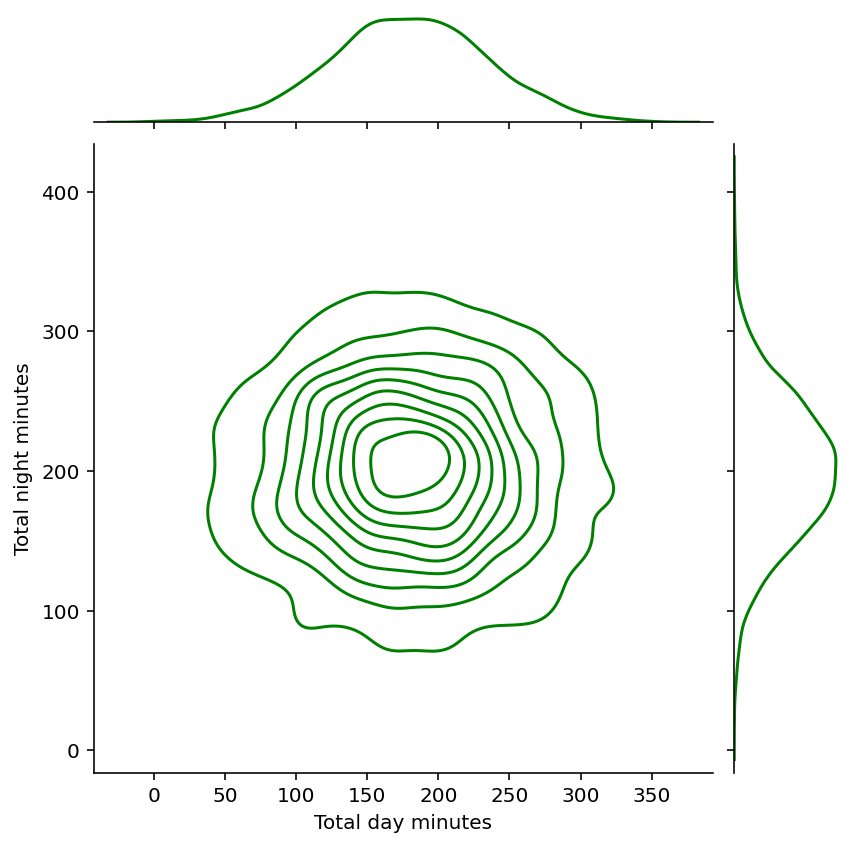

In [ ]:
sns.jointplot('Total day minutes', 'Total night minutes', data=df, kind="kde", color = 'g')

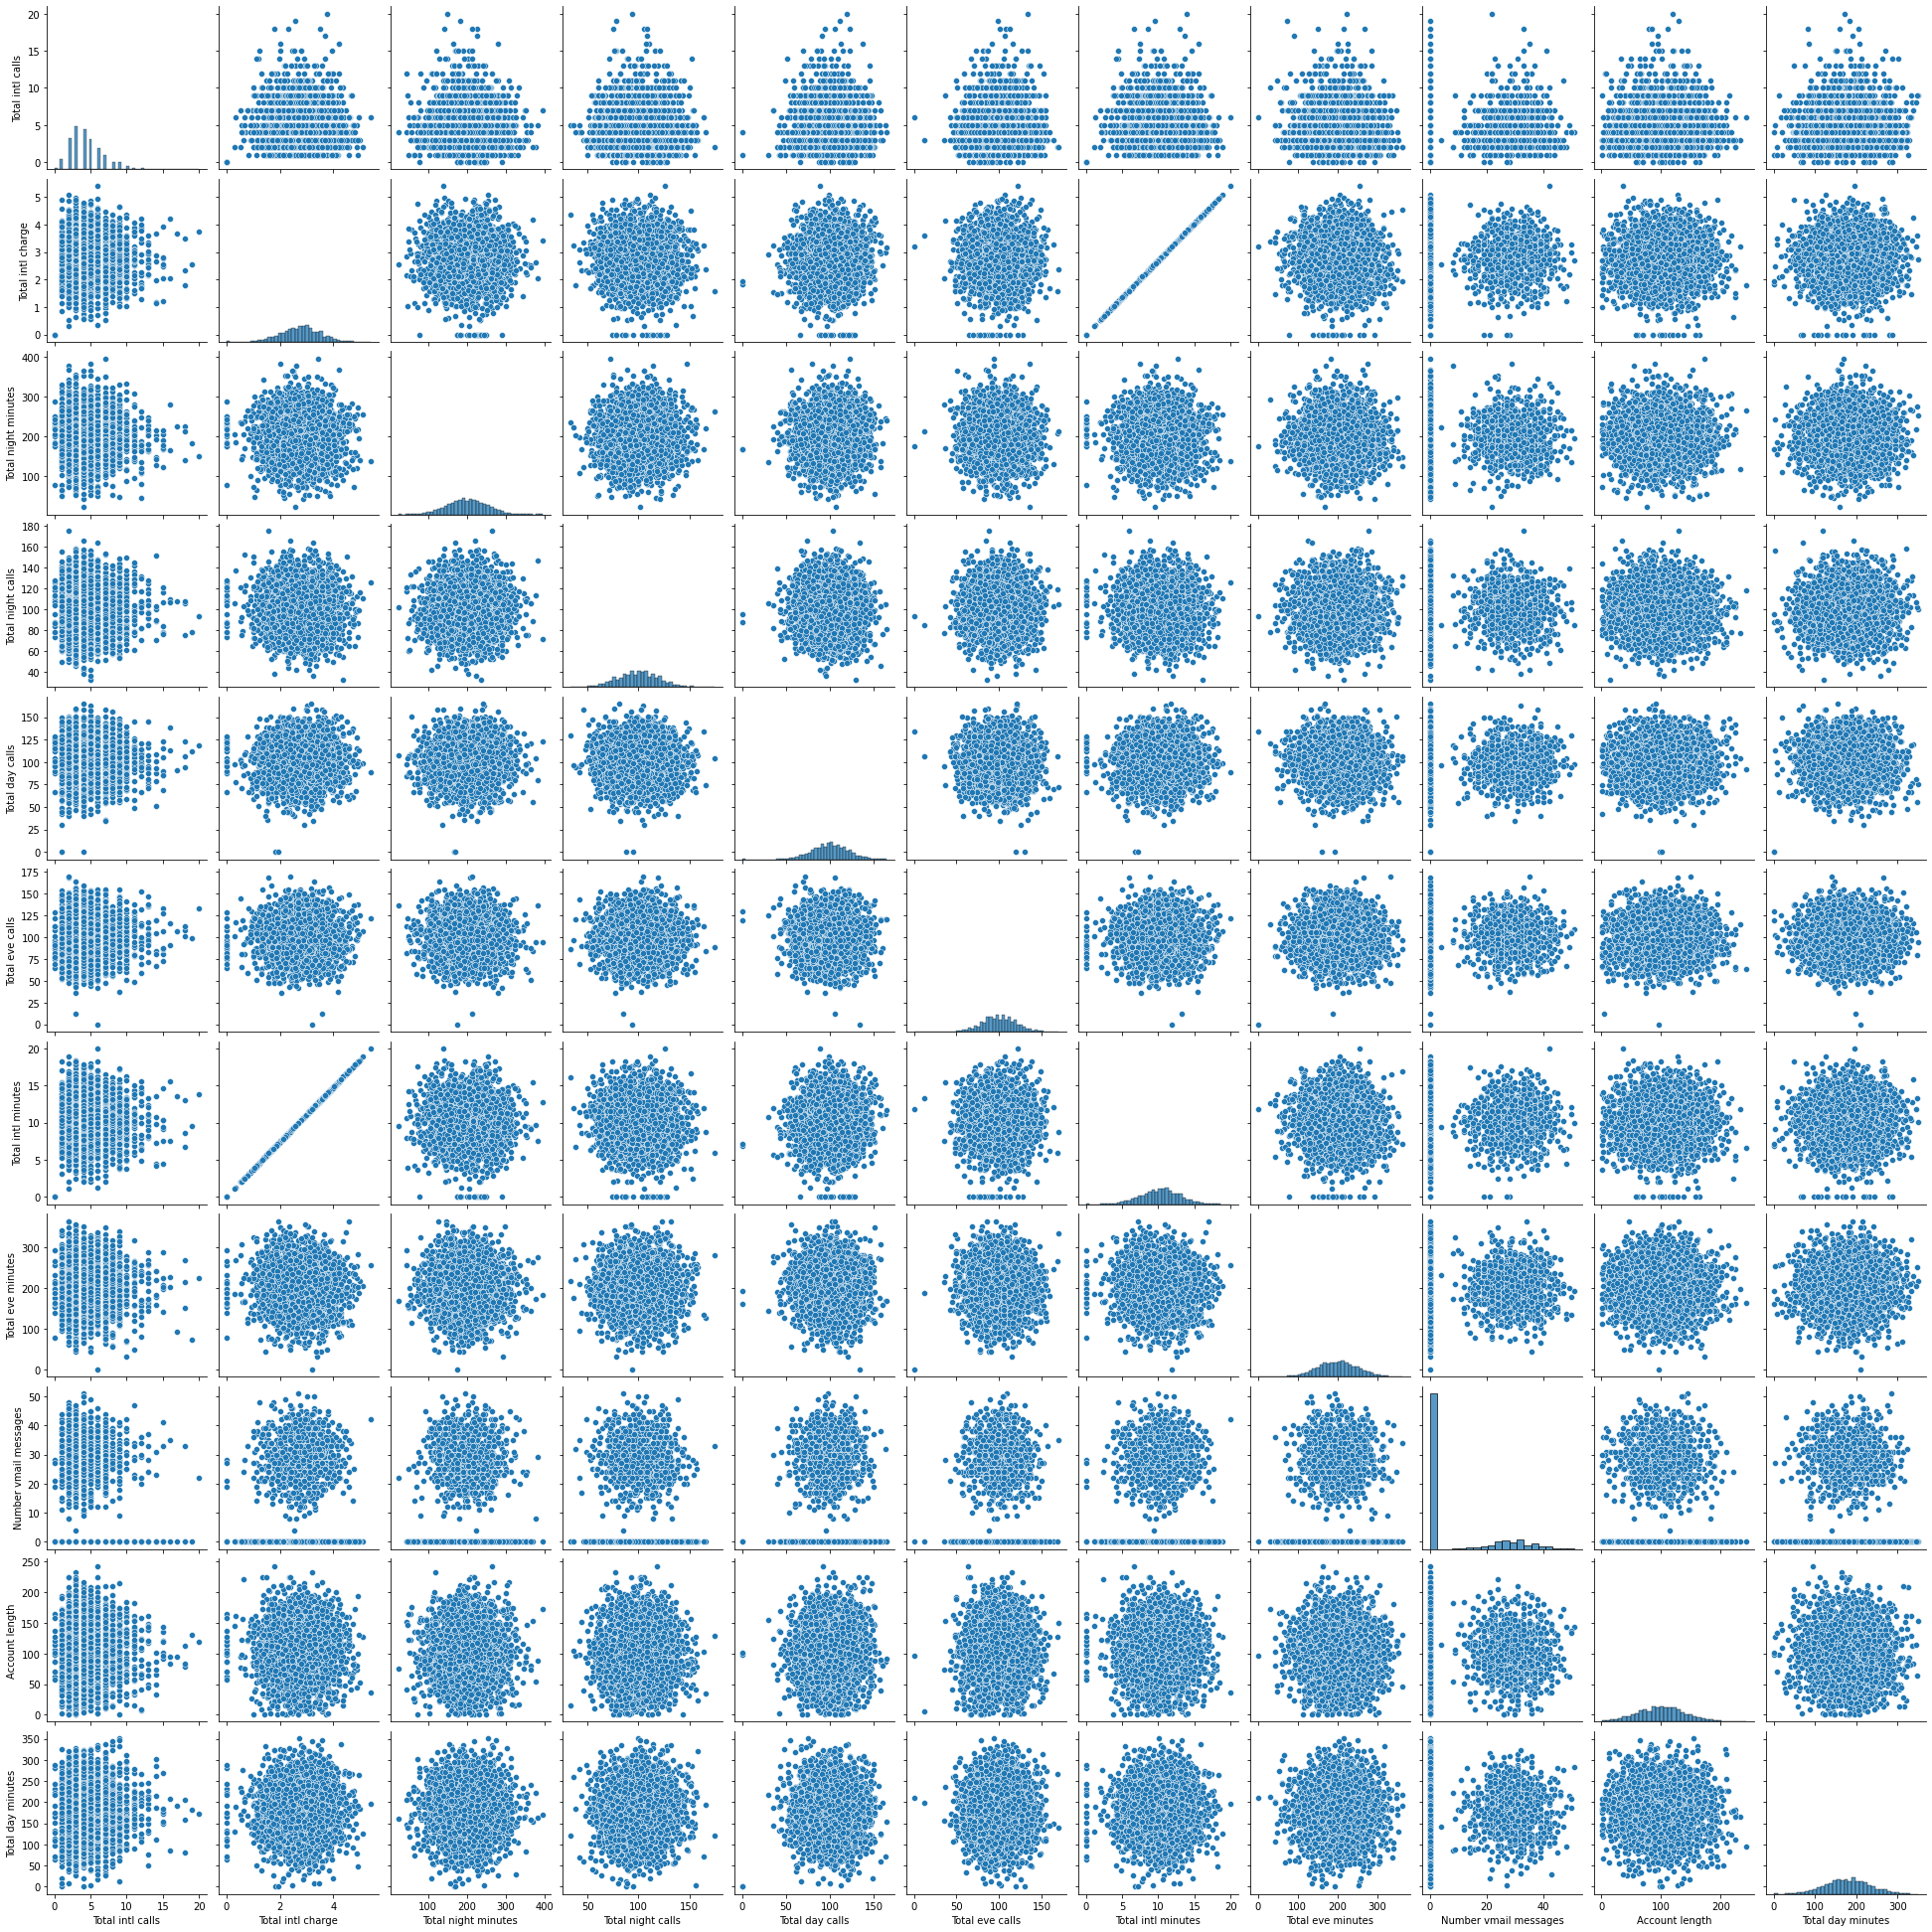

In [ ]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical])

In [ ]:
%config InlineBackend.figure_format = 'retina'


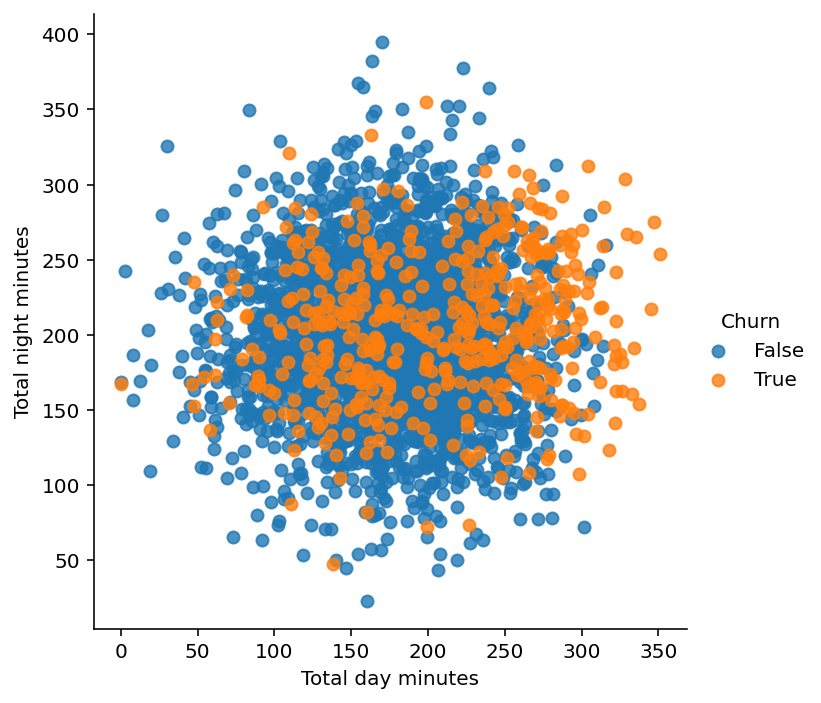

In [ ]:
sns.lmplot("Total day minutes","Total night minutes", data=df, hue="Churn", fit_reg=False)

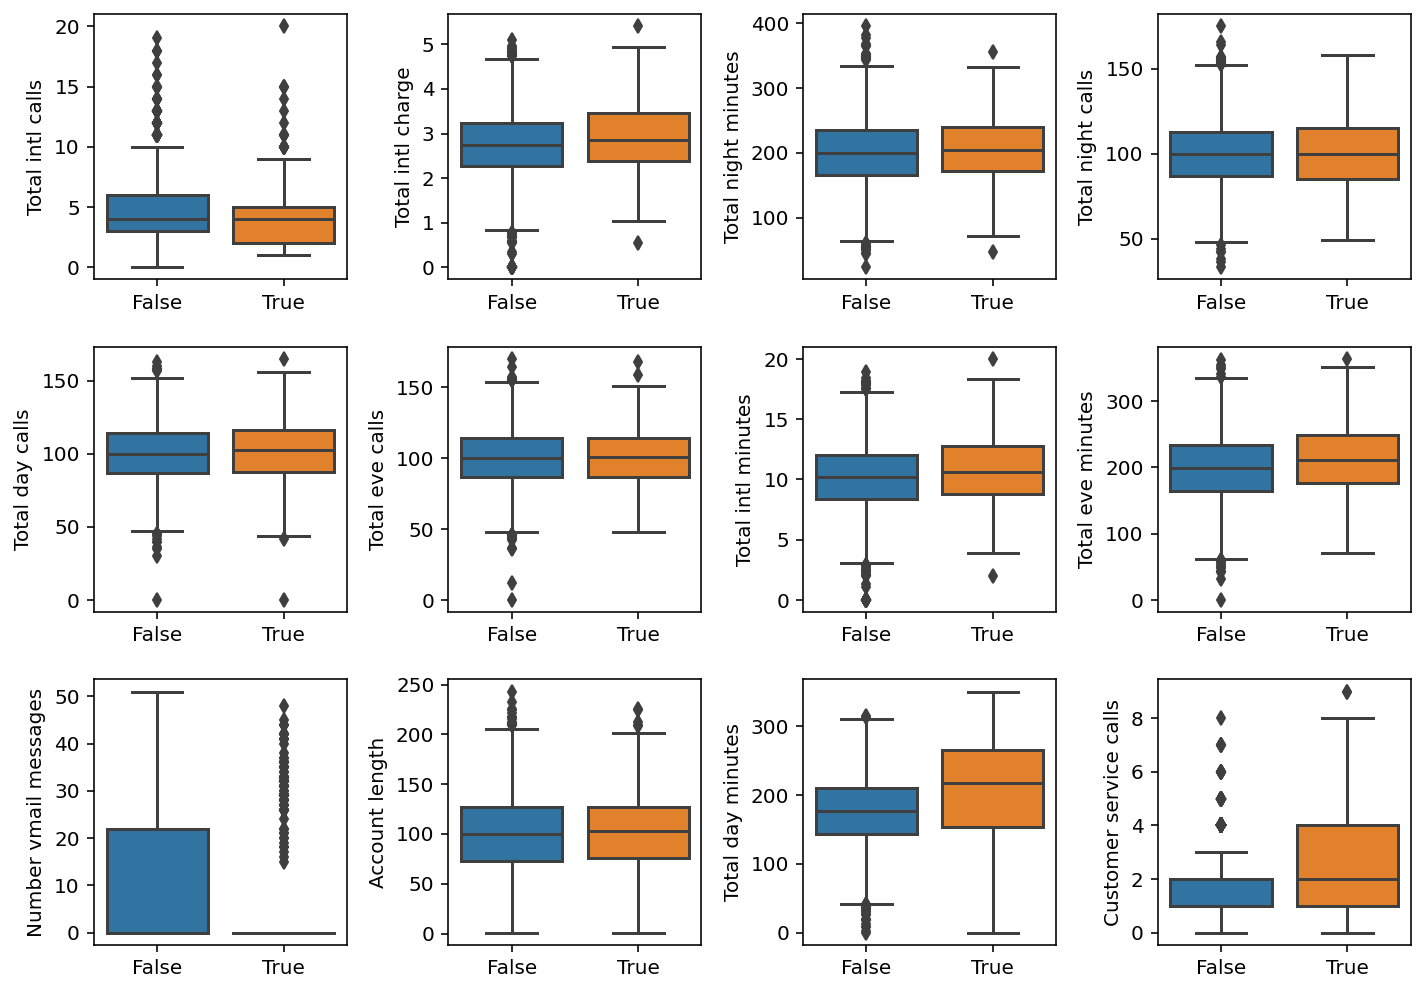

In [ ]:
numerical.append('Customer service calls')
fig, axes= plt.subplots(nrows=3, ncols=4, figsize=(10,7))
for idx, feat in enumerate(numerical):
  ax = axes[int(idx/4), idx%4]
  sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
  ax.set_xlabel("")
  ax.set_ylabel(feat)
fig.tight_layout()

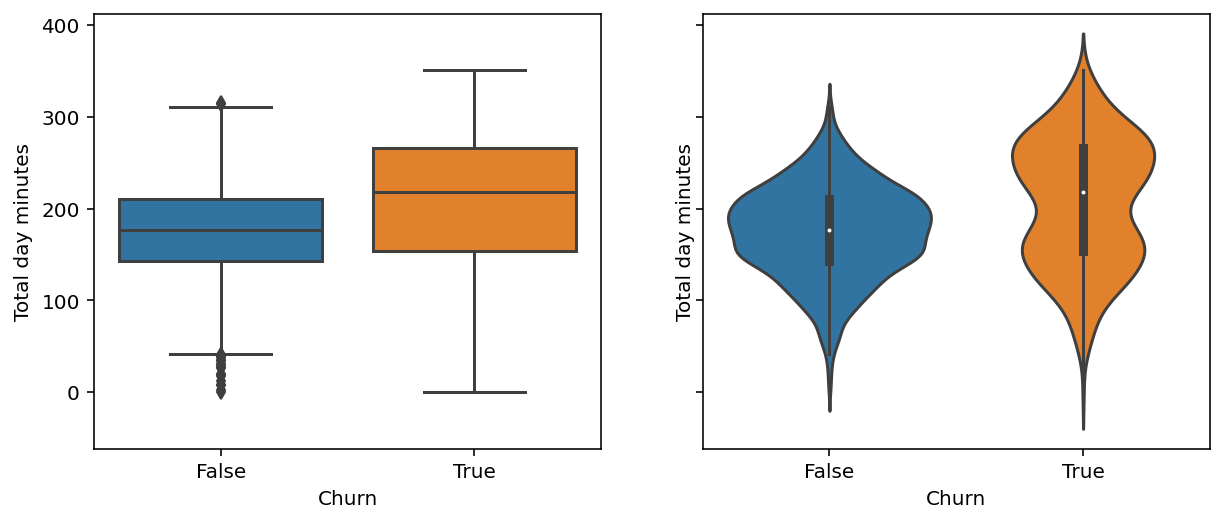

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True,figsize = (10,4))
sns.boxplot(x="Churn", y="Total day minutes", data =df,ax = axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data =df,ax = axes[1])

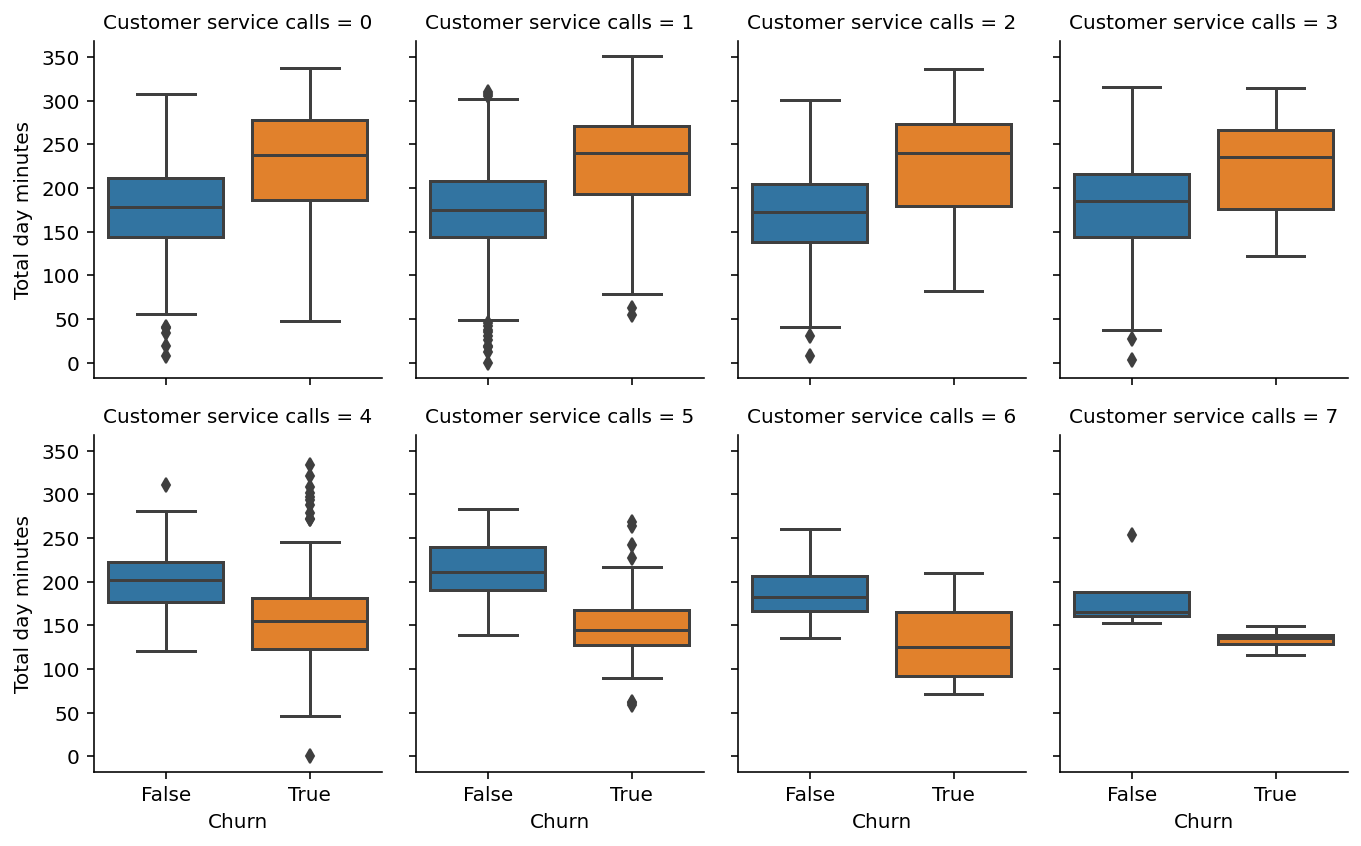

In [ ]:
sns.catplot(x='Churn',y='Total day minutes',col='Customer service calls',data = df[df['Customer service calls']<8], kind = 'box', col_wrap = 4, height=3, aspect=0.8)

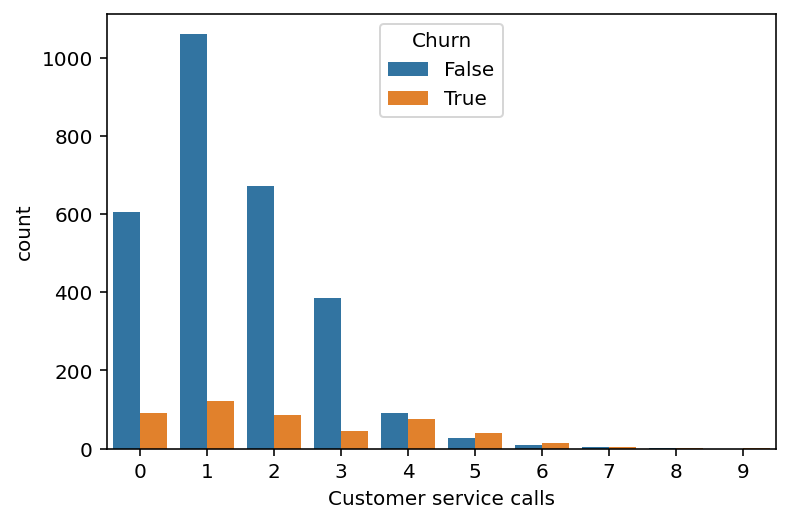

In [ ]:
sns.countplot(x="Customer service calls",hue="Churn", data=df)

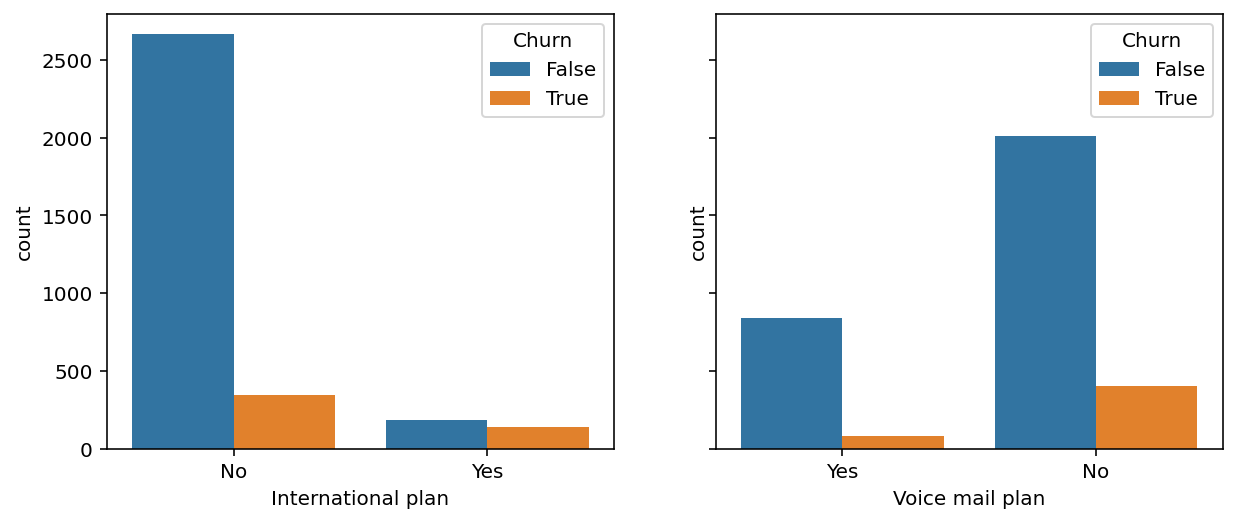

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True,figsize = (10,4))
sns.countplot(x="International plan",hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan",hue="Churn", data=df, ax=axes[1])

In [ ]:
pd.crosstab(df['State'],df['Churn']).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  ...  TN  TX  UT  VA  VT  WA  WI  WV  WY
Churn                                      ...                                    
False  49  72  44  60  25  57  62  49  52  ...  48  54  62  72  65  52  71  96  68
True    3   8  11   4   9   9  12   5   9  ...   5  18  10   5   8  14   7  10   9

[2 rows x 51 columns]

In [ ]:
df.groupby(["State"])["Churn"].agg([np.mean]).sort_values(by="mean", ascending=False).T

State        NJ        CA    TX        MD  ...        VA      AZ        AK        HI
mean   0.264706  0.264706  0.25  0.242857  ...  0.064935  0.0625  0.057692  0.056604

[1 rows x 51 columns]

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop(['Churn','State'],axis=1)
X['International plan'] = X['International plan'].map({"Yes":1,"No":0})
X['Voice mail plan'] = X['Voice mail plan'].map({"Yes":1,"No":0})

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

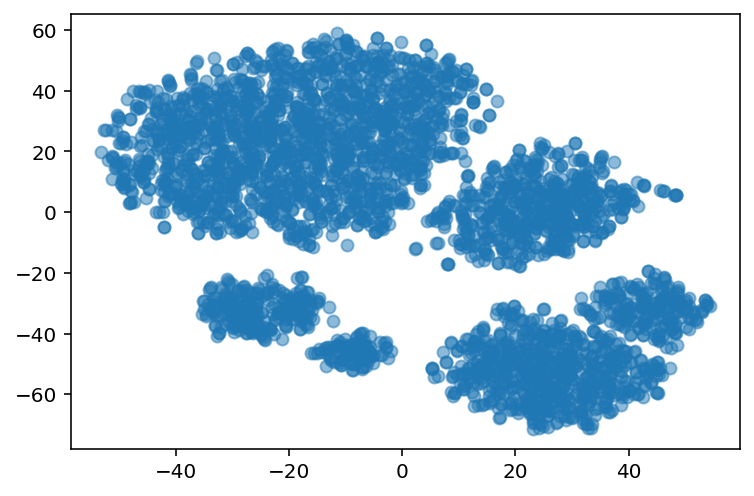

In [ ]:
plt.scatter(tsne_repr[:,0],tsne_repr[:,1],alpha=0.5)

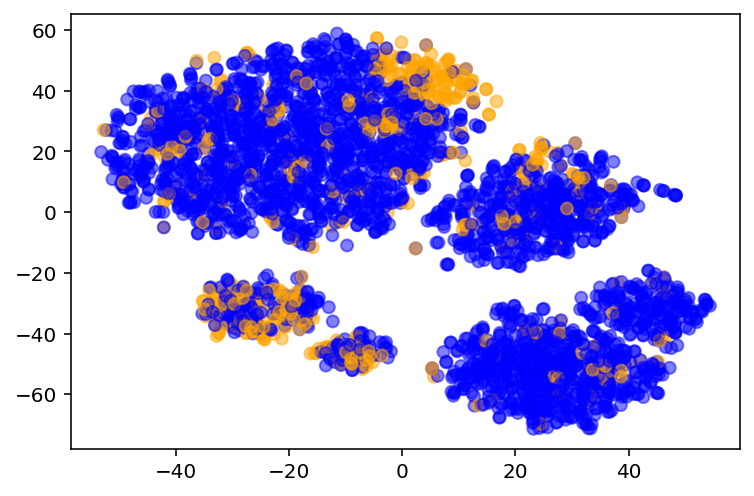

In [ ]:
plt.scatter(tsne_repr[:,0],tsne_repr[:,1],c = df['Churn'].map({False:"blue",True:"orange"}),alpha=0.5)

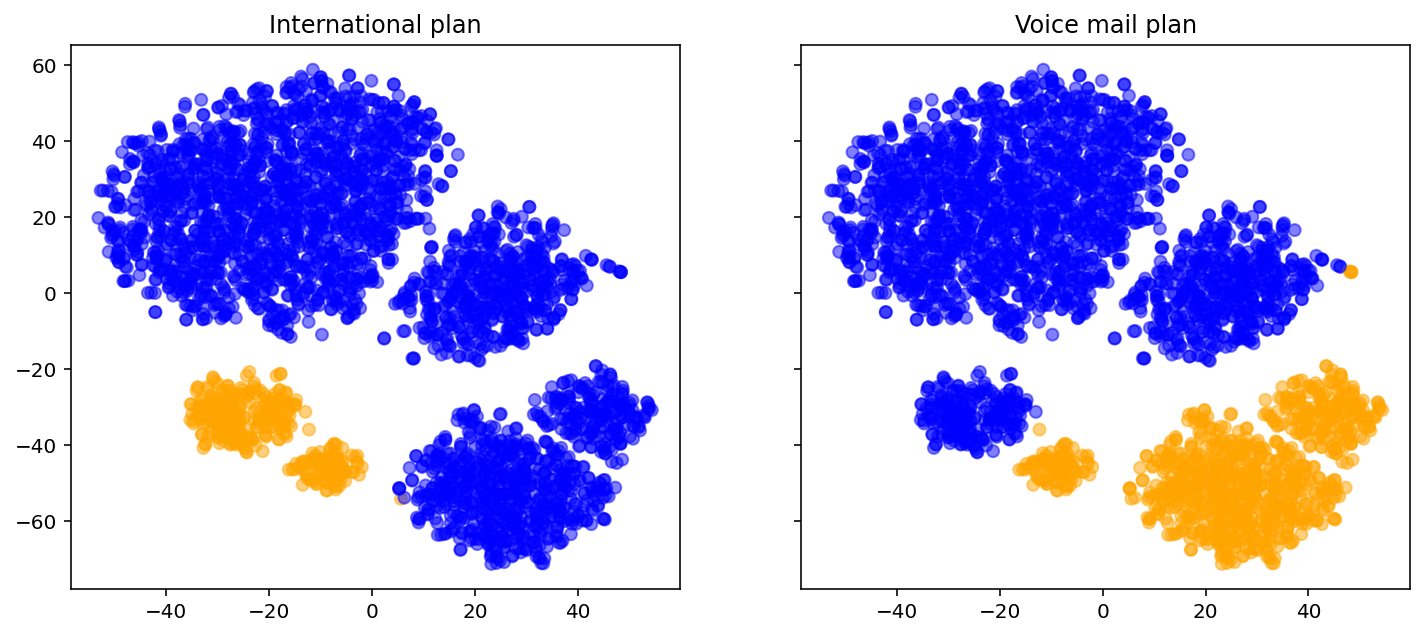

In [56]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["International plan", "Voice mail plan"]):
    axes[i].scatter(
        tsne_repr[:, 0],
        tsne_repr[:, 1],
        c=df[name].map({"Yes": "orange", "No": "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name);